In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import sys
import pandas as pd
import numpy as np
#sys.path.append("../../")

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("max_colwidth", 4000)
pd.options.display.expand_frame_repr = False


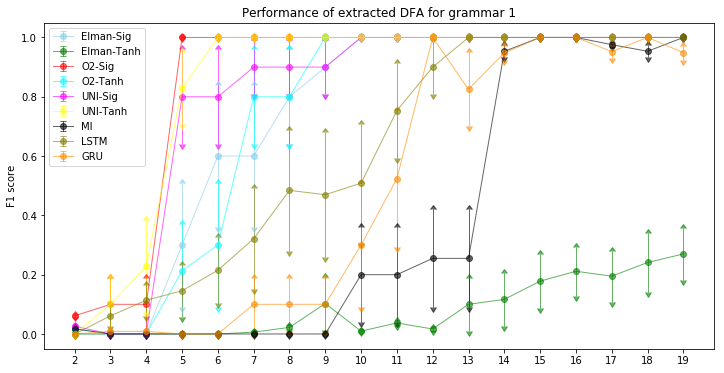

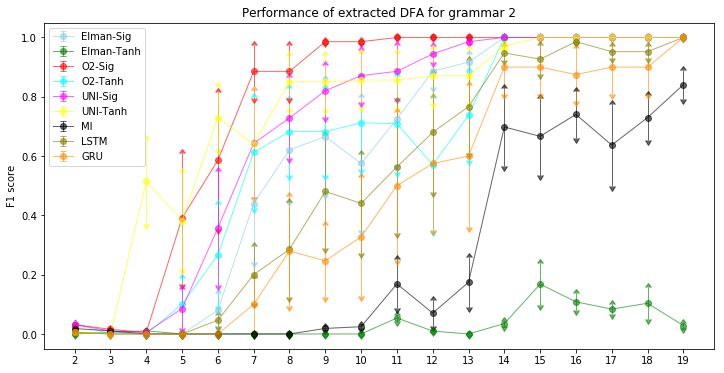

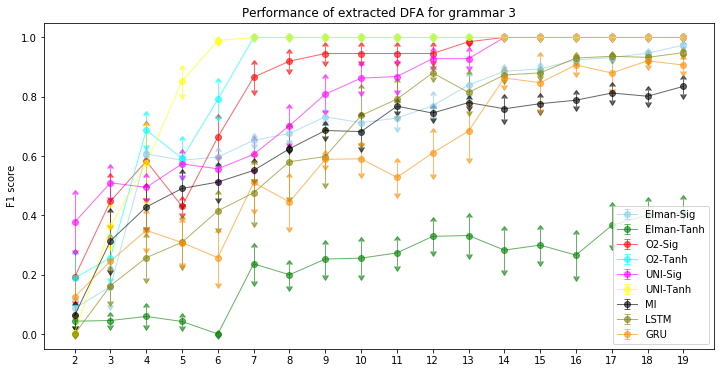

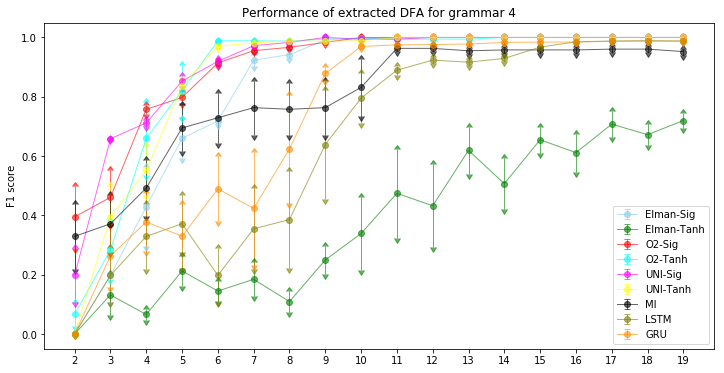

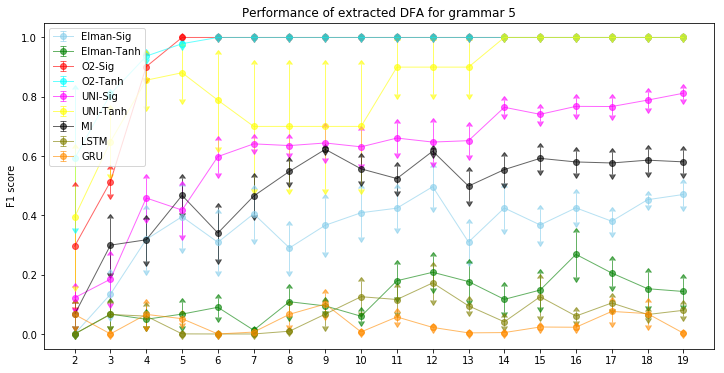

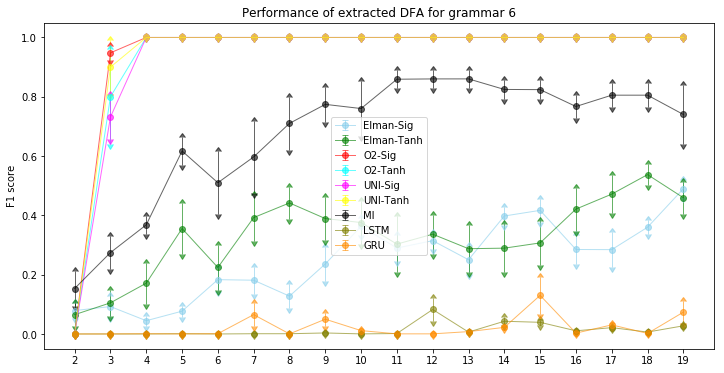

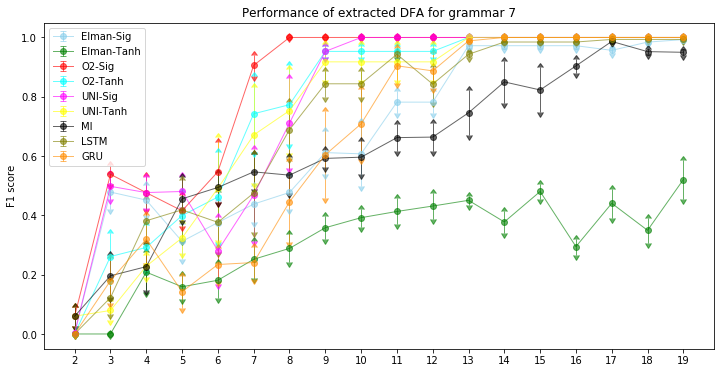

In [3]:
color_list = ['skyblue', "green", "red", "cyan", "magenta",
              "yellow", "black", "olive", "darkorange"]
model_list = ["Elman-Sig","Elman-Tanh","O2-Sig","O2-Tanh",
              "UNI-Sig","UNI-Tanh","MI","LSTM","GRU"]

k = np.arange(18)

num_grammars = 7
num_trials = 10
num_models = len(model_list)
num_k = k.shape[0]

extract_log_all = np.zeros((num_grammars,num_trials,num_models,num_k))

for grammar_id in range(1,num_grammars+1):
    for seed in range(1,11):
        extract_f1_log_filename = ''.join(('./params/tomita/g', str(grammar_id),
                                   '_seed', str(seed), '_f1_log.npz'))
        if os.path.exists(extract_f1_log_filename):
            extract_log_file = np.load(extract_f1_log_filename)
            extract_log_all[grammar_id-1, seed-1] = extract_log_file['extract_f1_log']
        else:
            print("no such file " + extract_f1_log_filename)
            
    
    y = np.mean(extract_log_all,axis=1)
    yerr = np.var(extract_log_all,axis=1)
    
    fig = plt.figure(figsize=(12, 6))
    for model_id in range(num_models):
        plt.errorbar(k, y[grammar_id-1, model_id], yerr=yerr[grammar_id-1, model_id], 
                     color=color_list[model_id], linewidth=1,  fmt='-o', uplims=True, lolims=True, 
                     label=model_list[model_id], alpha=0.6)
    
    plt.ylabel('F1 score')
    plt.title('Performance of extracted DFA for grammar ' + str(grammar_id))
    plt.xticks(k, [str(i) for i in range(2,20)])
    #plt.yticks(np.arange(0, 81, 10))
    plt.legend()
    plt.show()

In [104]:
extract_log_all.shape

(7, 10, 9, 18)

In [14]:
success_log.shape, num_grammars

((7, 9), 7)

In [18]:
success_log[i]

array([ 0.73333333,  0.04444444,  0.84444444,  0.72777778,  0.79444444,
        0.83888889,  0.36111111,  0.56111111,  0.47777778])

<BarContainer object of 7 artists>

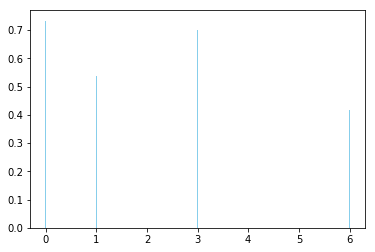

In [19]:
ind = np.arange(num_grammars) 
width = 0.01 
i, m, c = 0, 'Elman-Sig', 'skyblue'
plt.bar(ind, success_log[:,i], width, label=m, color=c)

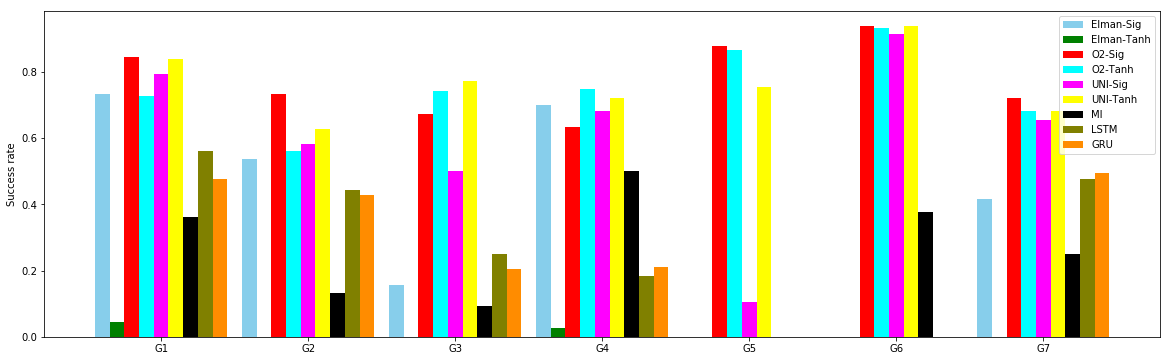

In [30]:
ind = np.arange(num_grammars) 
width = 0.1      

fig = plt.figure(figsize=(20, 6))
for i, m, c in zip(np.arange(num_models), model_list, color_list):
    plt.bar(ind + i*width, success_log[:,i], width, label=m, color=c)

plt.ylabel('Success rate')

plt.xticks(ind + width*4, ('G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7'))
plt.legend(loc='best')
plt.show()

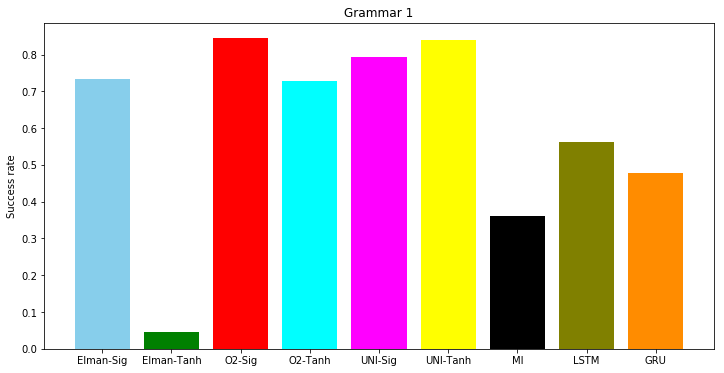

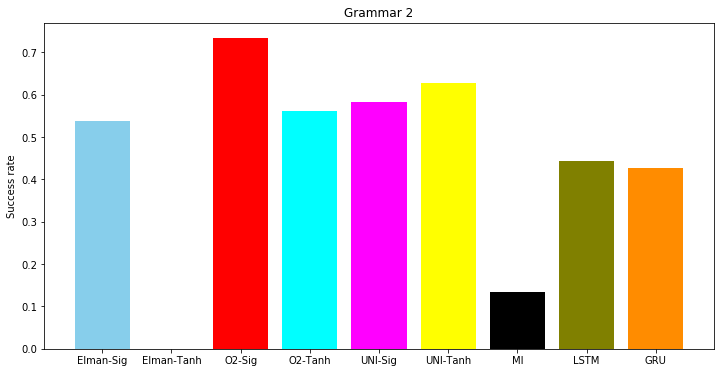

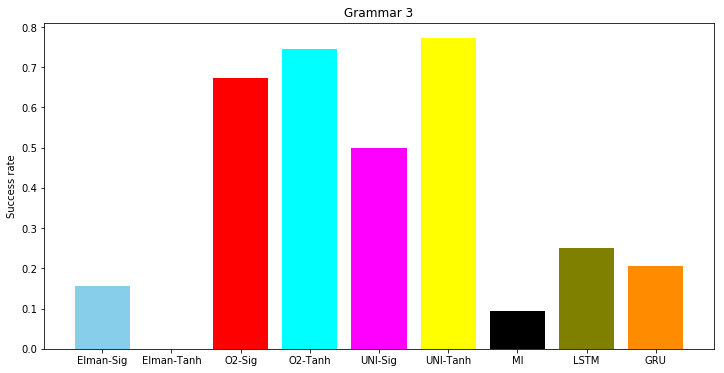

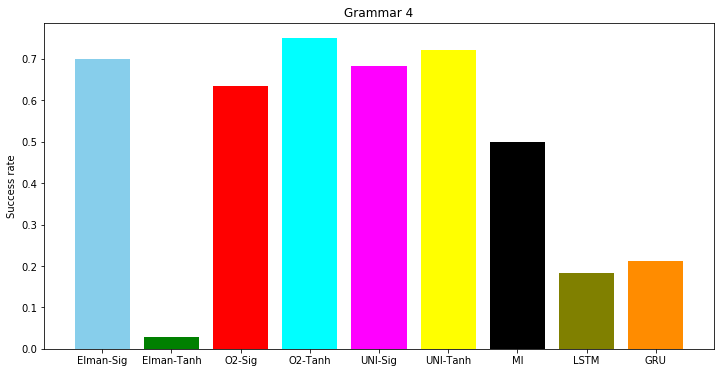

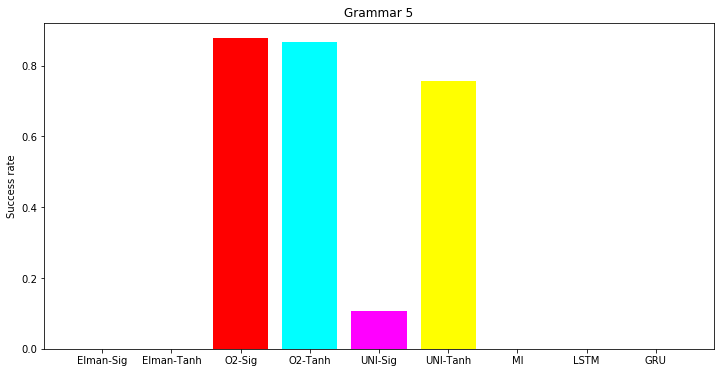

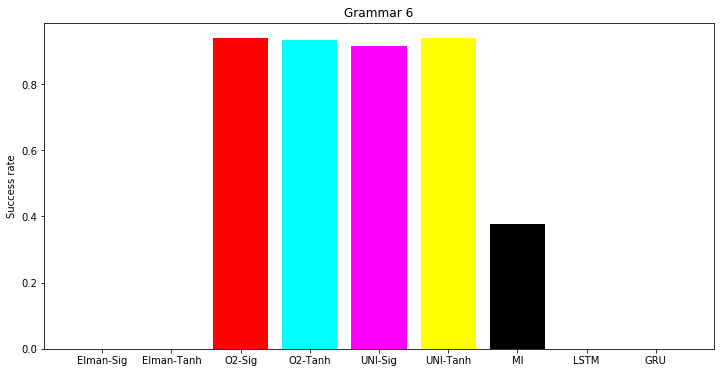

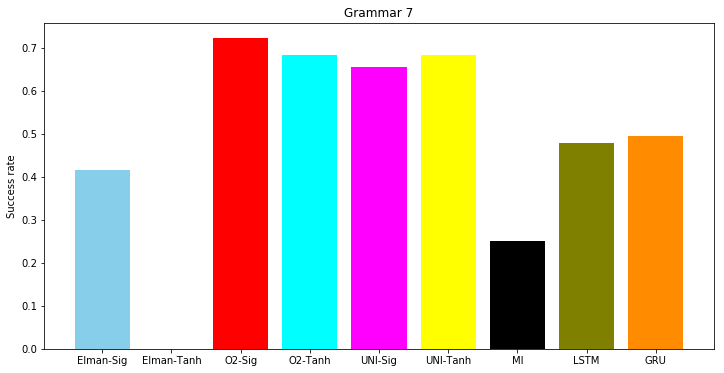

[[ 0.73333333  0.04444444  0.84444444  0.72777778  0.79444444  0.83888889
   0.36111111  0.56111111  0.47777778]
 [ 0.53888889  0.          0.73333333  0.56111111  0.58333333  0.62777778
   0.13333333  0.44444444  0.42777778]
 [ 0.15555556  0.          0.67222222  0.74444444  0.5         0.77222222
   0.09444444  0.25        0.20555556]
 [ 0.7         0.02777778  0.63333333  0.75        0.68333333  0.72222222
   0.5         0.18333333  0.21111111]
 [ 0.          0.          0.87777778  0.86666667  0.10555556  0.75555556
   0.          0.          0.        ]
 [ 0.          0.          0.93888889  0.93333333  0.91666667  0.93888889
   0.37777778  0.          0.        ]
 [ 0.41666667  0.          0.72222222  0.68333333  0.65555556  0.68333333
   0.25        0.47777778  0.49444444]]


In [5]:
success_log = np.zeros((num_grammars, num_models))
for grammar_id in range(1,num_grammars+1):
    for model_id in range(num_models):
        success_log[grammar_id-1, model_id] = np.where(
            extract_log_all[grammar_id-1,:,model_id,:] == 1.0
        )[0].shape[0]
        success_log[grammar_id-1, model_id] = success_log[grammar_id-1, model_id] / 180.0
        
    fig = plt.figure(figsize=(12, 6))
    plt.bar(np.arange(num_models), success_log[grammar_id-1], color=color_list)
    #plt.xlabel("Energy Source")
    plt.ylabel("Success rate")
    plt.title("Grammar " + str(grammar_id))
    
    plt.xticks(np.arange(num_models), model_list)
    plt.show()
    
print(success_log)

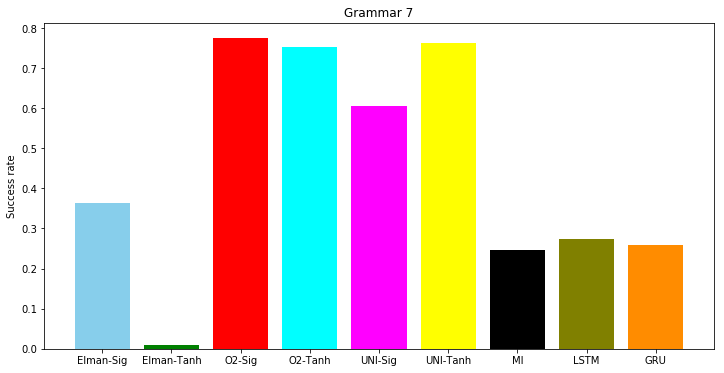

In [155]:
fig = plt.figure(figsize=(12, 6))
plt.bar(np.arange(num_models), success_log.mean(axis=0), color=color_list)
#plt.xlabel("Energy Source")
plt.ylabel("Success rate")
plt.title("Grammar " + str(grammar_id))
    
plt.xticks(np.arange(num_models), model_list)
plt.show()

In [6]:
success_log.shape

(7, 9)

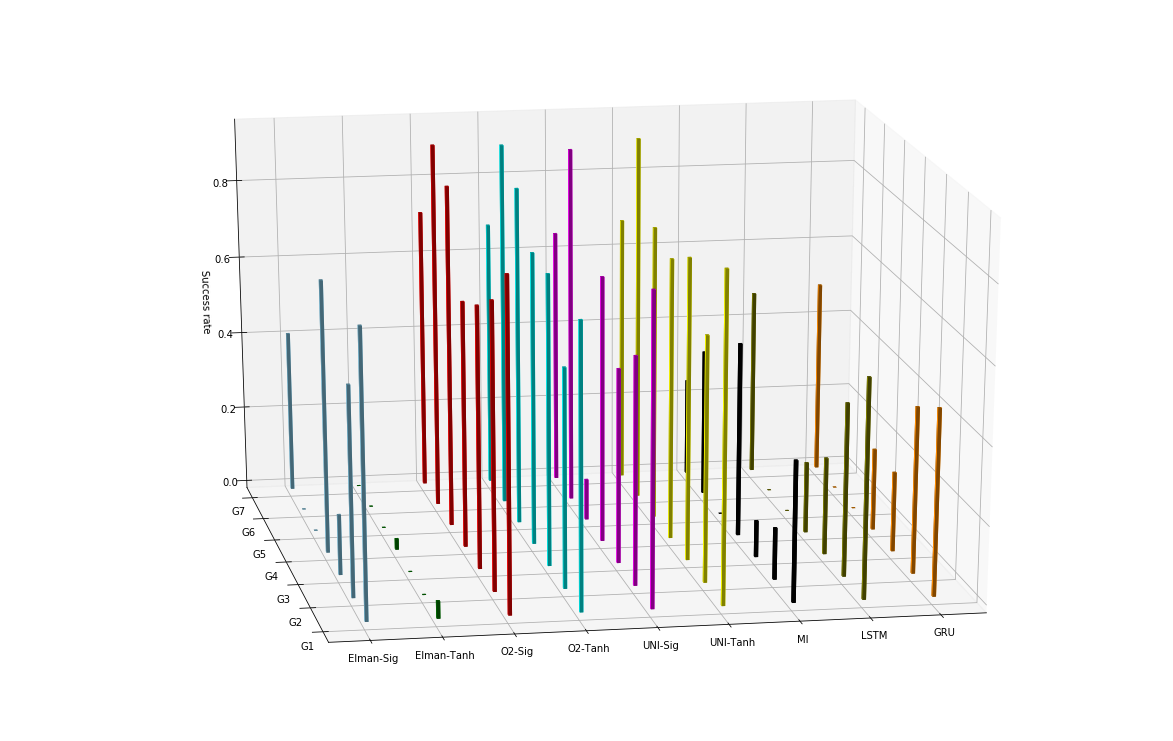

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = success_log

column_names = model_list
row_names = ['G1','G2','G3','G4','G5','G6','G7']

fig = plt.figure(figsize=(16, 10))
ax = Axes3D(fig)

lx= len(data[0])            # Work out matrix dimensions
ly= len(data[:,0])
xpos = np.arange(0,lx,1)    # Set up a mesh of positions
ypos = np.arange(0,ly,1)
xpos, ypos = np.meshgrid(xpos+0.01, ypos+0.01)

xpos = xpos.flatten()   # Convert positions to 1D array
ypos = ypos.flatten()
zpos = np.zeros(lx*ly)

dx = 0.05 * np.ones_like(zpos)
dy = dx.copy()
dz = data.flatten()

cs = color_list * ly

ax.bar3d(xpos,ypos,zpos, dx, dy, dz, color=cs)

#sh()
ax.w_xaxis.set_ticklabels(column_names)
ax.w_yaxis.set_ticklabels(row_names)
#ax.set_xlabel('Model')
#ax.set_ylabel('Grammar')
ax.set_zlabel('Success rate')

#plt.show()

# rotate the axes and update
angle = 260
ax.view_init(20, angle)
plt.draw()

In [117]:
row_names

['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7']

In [80]:
model_list

['Elman-Sig',
 'Elman-Tanh',
 'O2-Sig',
 'O2-Tanh',
 'UNI-Sig',
 'UNI-Tanh',
 'MI',
 'LSTM',
 'GRU']

In [70]:
rnn_config_lib = {}
rnn_config_lib['SRN_sigmoid'] = {}
rnn_config_lib['SRN_sigmoid']['name'] = 'Elman-Sig'
rnn_config_lib['SRN_sigmoid']['weights'] = ['U','V','B']
rnn_config_lib['SRN_sigmoid']['nhid'] = [64, 64, 64, 64, 128, 128, 64]

rnn_config_lib['SRN_tanh'] = {}
rnn_config_lib['SRN_tanh']['name'] = 'Elman-Tanh'
rnn_config_lib['SRN_tanh']['weights'] = ['U','V','B']
rnn_config_lib['SRN_tanh']['nhid'] = [64, 64, 64, 64, 128, 128, 64]


rnn_config_lib['O2_sigmoid'] = {}
rnn_config_lib['O2_sigmoid']['name'] = 'O2-Sig'
rnn_config_lib['O2_sigmoid']['weights'] = ['W']
rnn_config_lib['O2_sigmoid']['nhid'] = [46, 46, 46, 46, 91, 91, 46]

rnn_config_lib['O2_tanh'] = {}
rnn_config_lib['O2_tanh']['name'] = 'O2-Tanh'
rnn_config_lib['O2_tanh']['weights'] = ['W']
rnn_config_lib['O2_tanh']['nhid'] = [46, 46, 46, 46, 91, 91, 46]


rnn_config_lib['UNI_sigmoid'] = {}
rnn_config_lib['UNI_sigmoid']['name'] = 'UNI-Sig'
rnn_config_lib['UNI_sigmoid']['weights'] = ['W','U','V','B']
rnn_config_lib['UNI_sigmoid']['nhid'] = [37, 37, 37, 37, 73, 73, 37]

rnn_config_lib['UNI_tanh'] = {}
rnn_config_lib['UNI_tanh']['name'] = 'UNI-Tanh'
rnn_config_lib['UNI_tanh']['weights'] = ['W','U','V','B']
rnn_config_lib['UNI_tanh']['nhid'] = [37, 37, 37, 37, 73, 73, 37]


rnn_config_lib['MI_tanh'] = {}
rnn_config_lib['MI_tanh']['name'] = 'MI'
rnn_config_lib['MI_tanh']['weights'] = ['U','V','B','alpha','beta1','beta2']
rnn_config_lib['MI_tanh']['nhid'] = [62, 62, 62, 62, 126, 126, 62]

In [71]:
rnn_names = ['SRN_sigmoid','O2_sigmoid','UNI_sigmoid','MI_tanh']

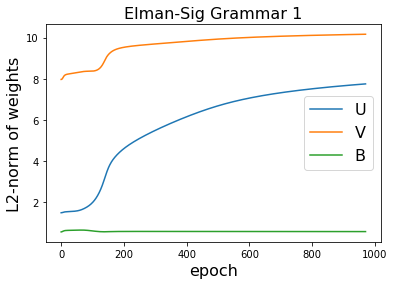

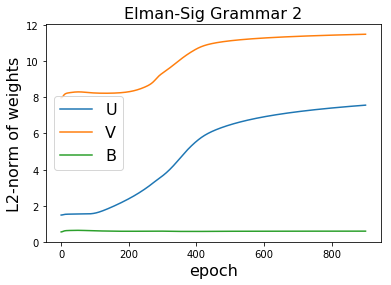

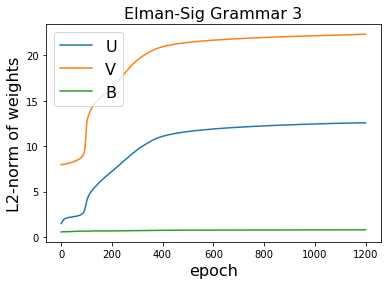

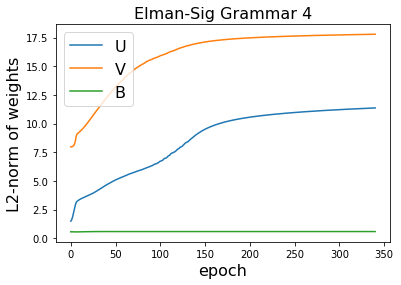

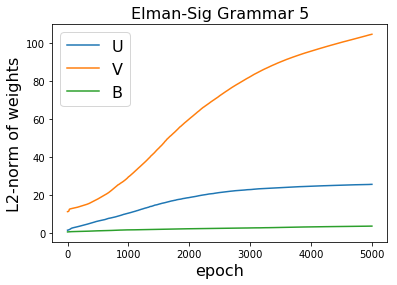

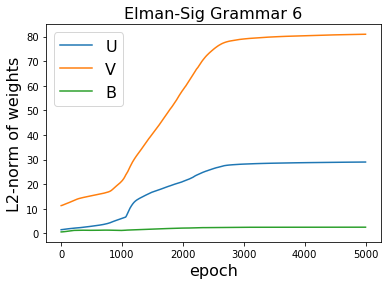

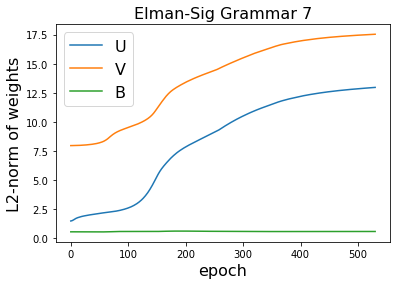

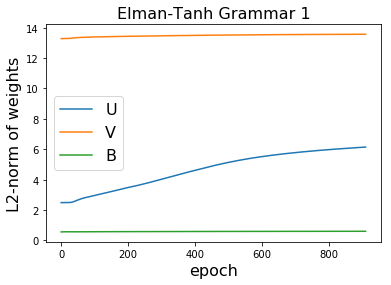

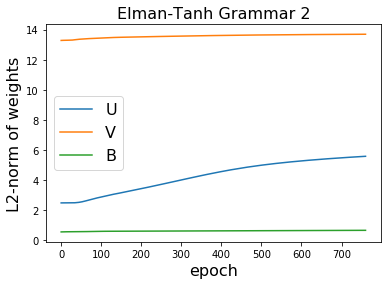

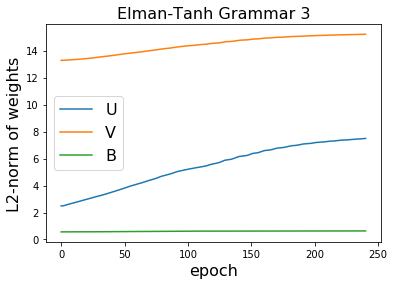

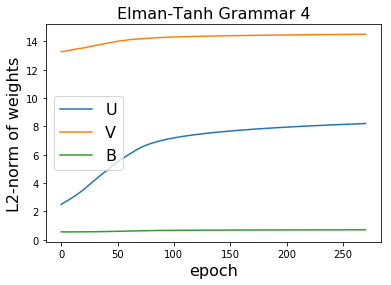

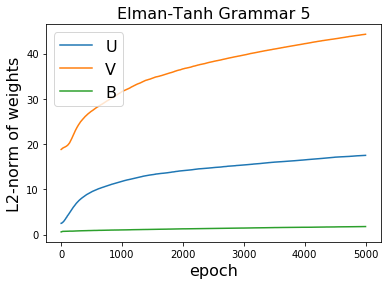

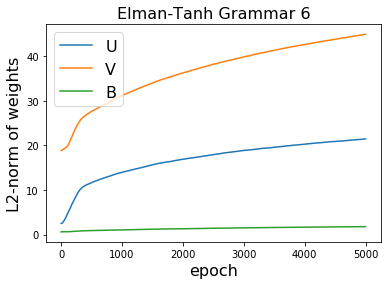

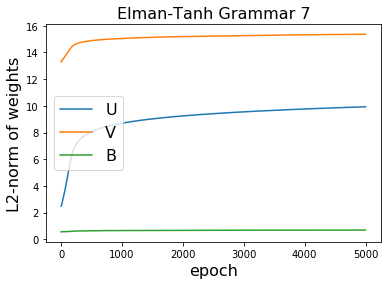

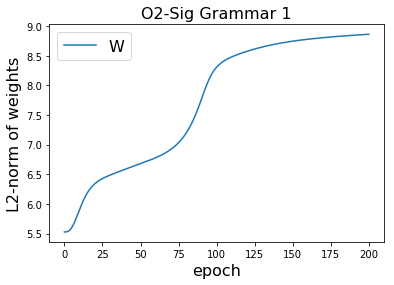

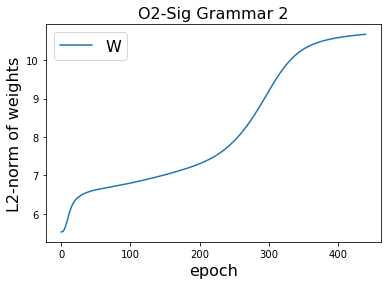

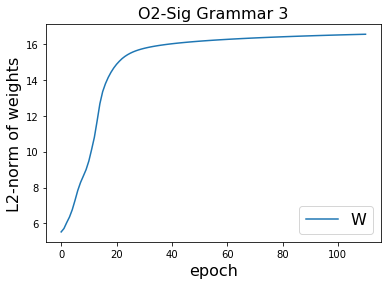

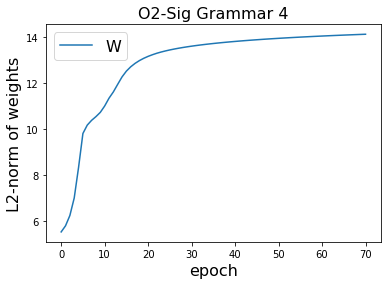

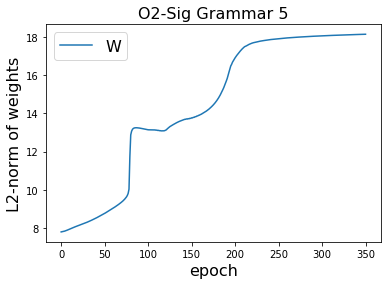

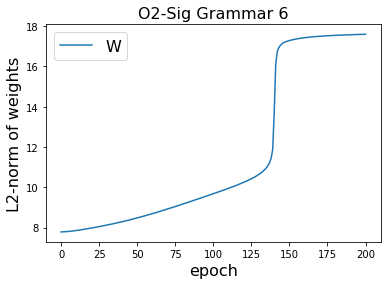

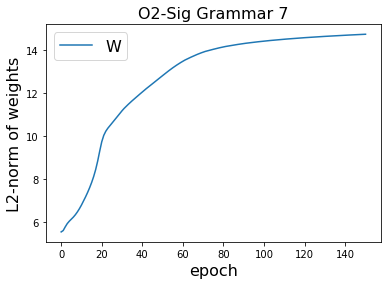

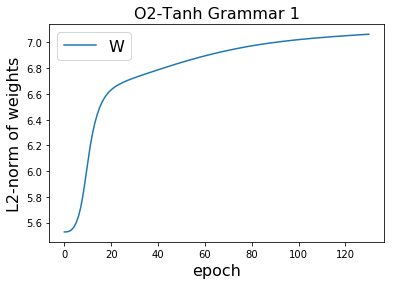

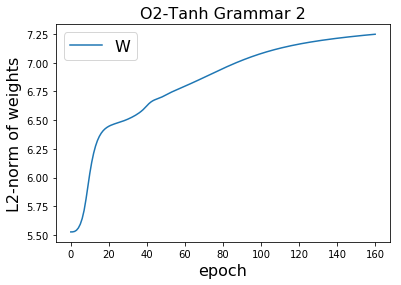

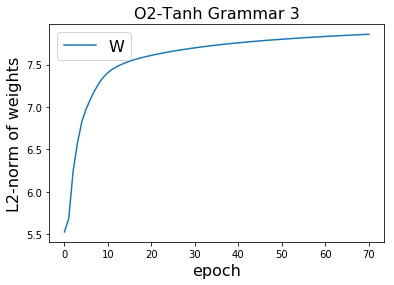

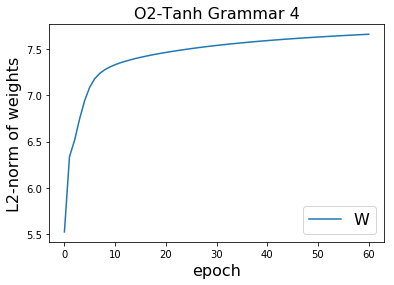

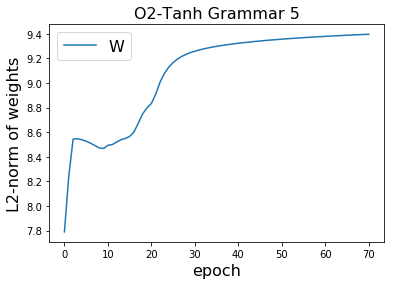

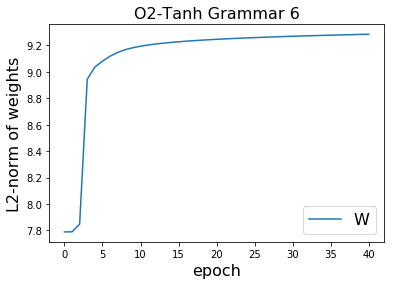

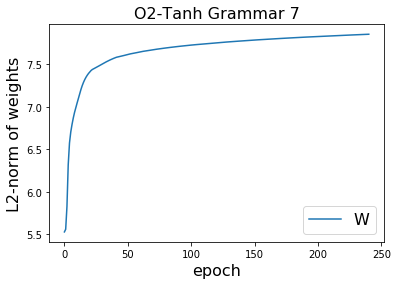

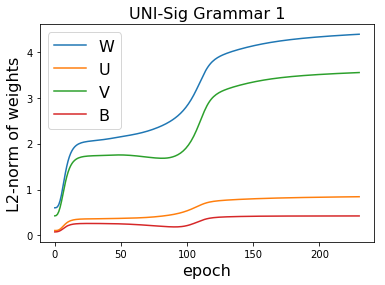

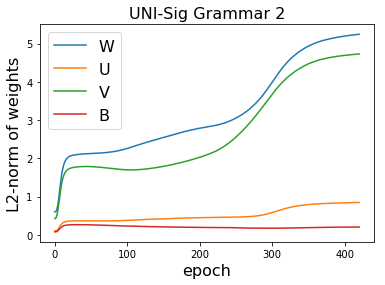

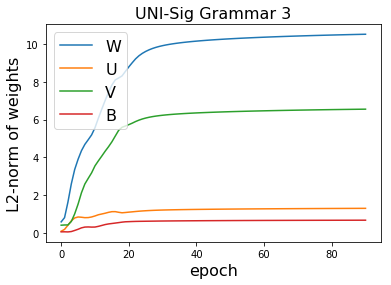

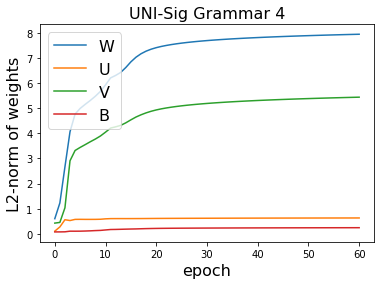

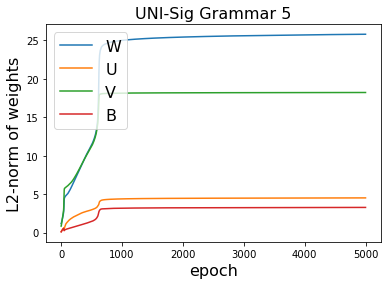

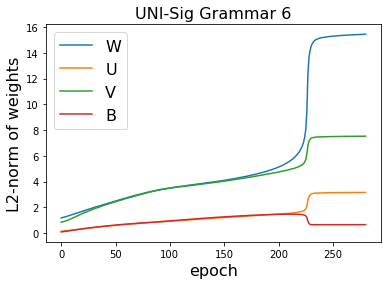

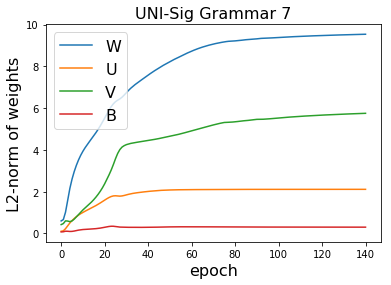

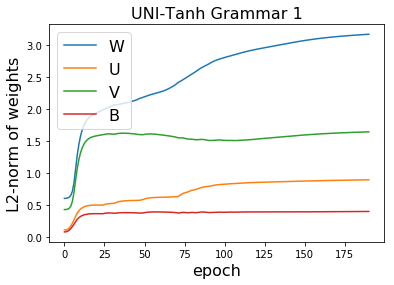

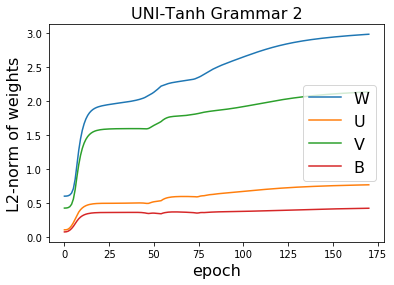

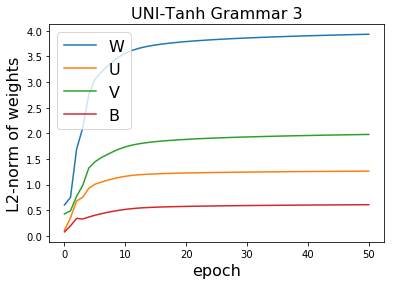

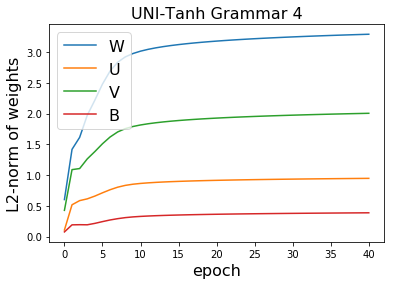

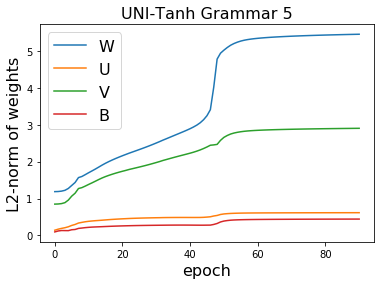

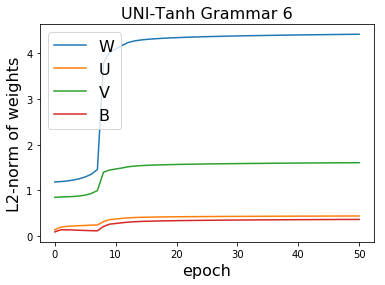

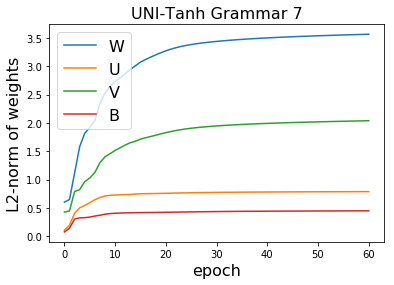

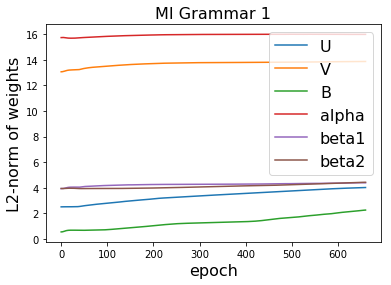

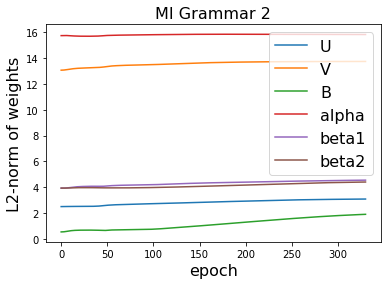

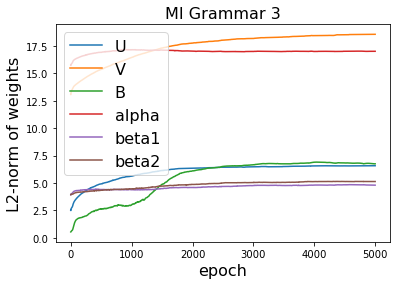

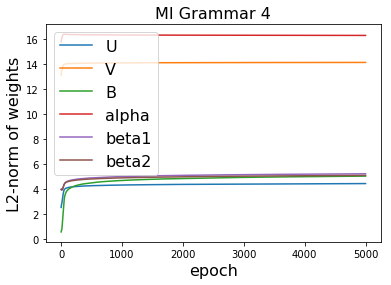

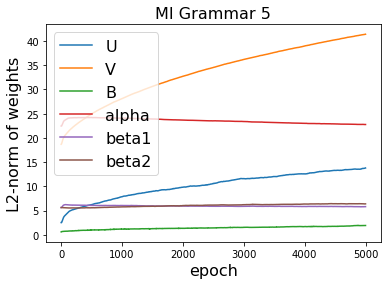

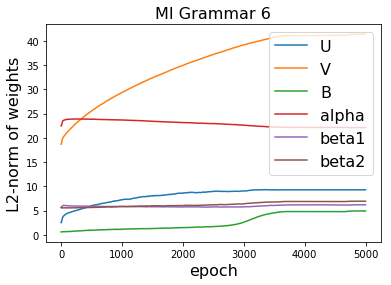

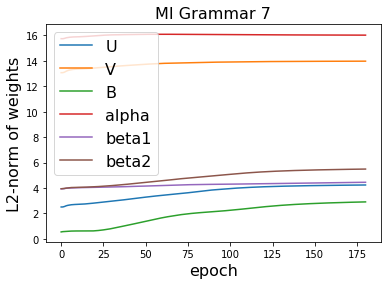

In [64]:
seed = 1
for m in rnn_names:
    #fig, axs = plt.subplots(7,)
    for g in range(1,num_grammars+1):
        params_log_filename = './params/tomita/g' + str(g) + '_' + m + '_h' \
                                  + str(rnn_config_lib[m]['nhid'][g-1]) \
                                  + '_seed' + str(seed) + '_params_log.npz'
        
        params_log_file = np.load(params_log_filename)
        params_log = params_log_file['log']
        assert params_log.shape[1] == len(rnn_config_lib[m]['weights'])
        fig = plt.figure(figsize=(6, 4))
        for j in range(len(rnn_config_lib[m]['weights'])):
            plt.plot(params_log[:,j], label=rnn_config_lib[m]['weights'][j])
            
        plt.title(rnn_config_lib[m]['name'] + " Grammar " + str(g), fontsize=16)
        plt.ylabel('L2-norm of weights', fontsize=16)
        plt.xlabel('epoch', fontsize=16)
        plt.legend(loc='best', fontsize=16)
        plt.show()
            

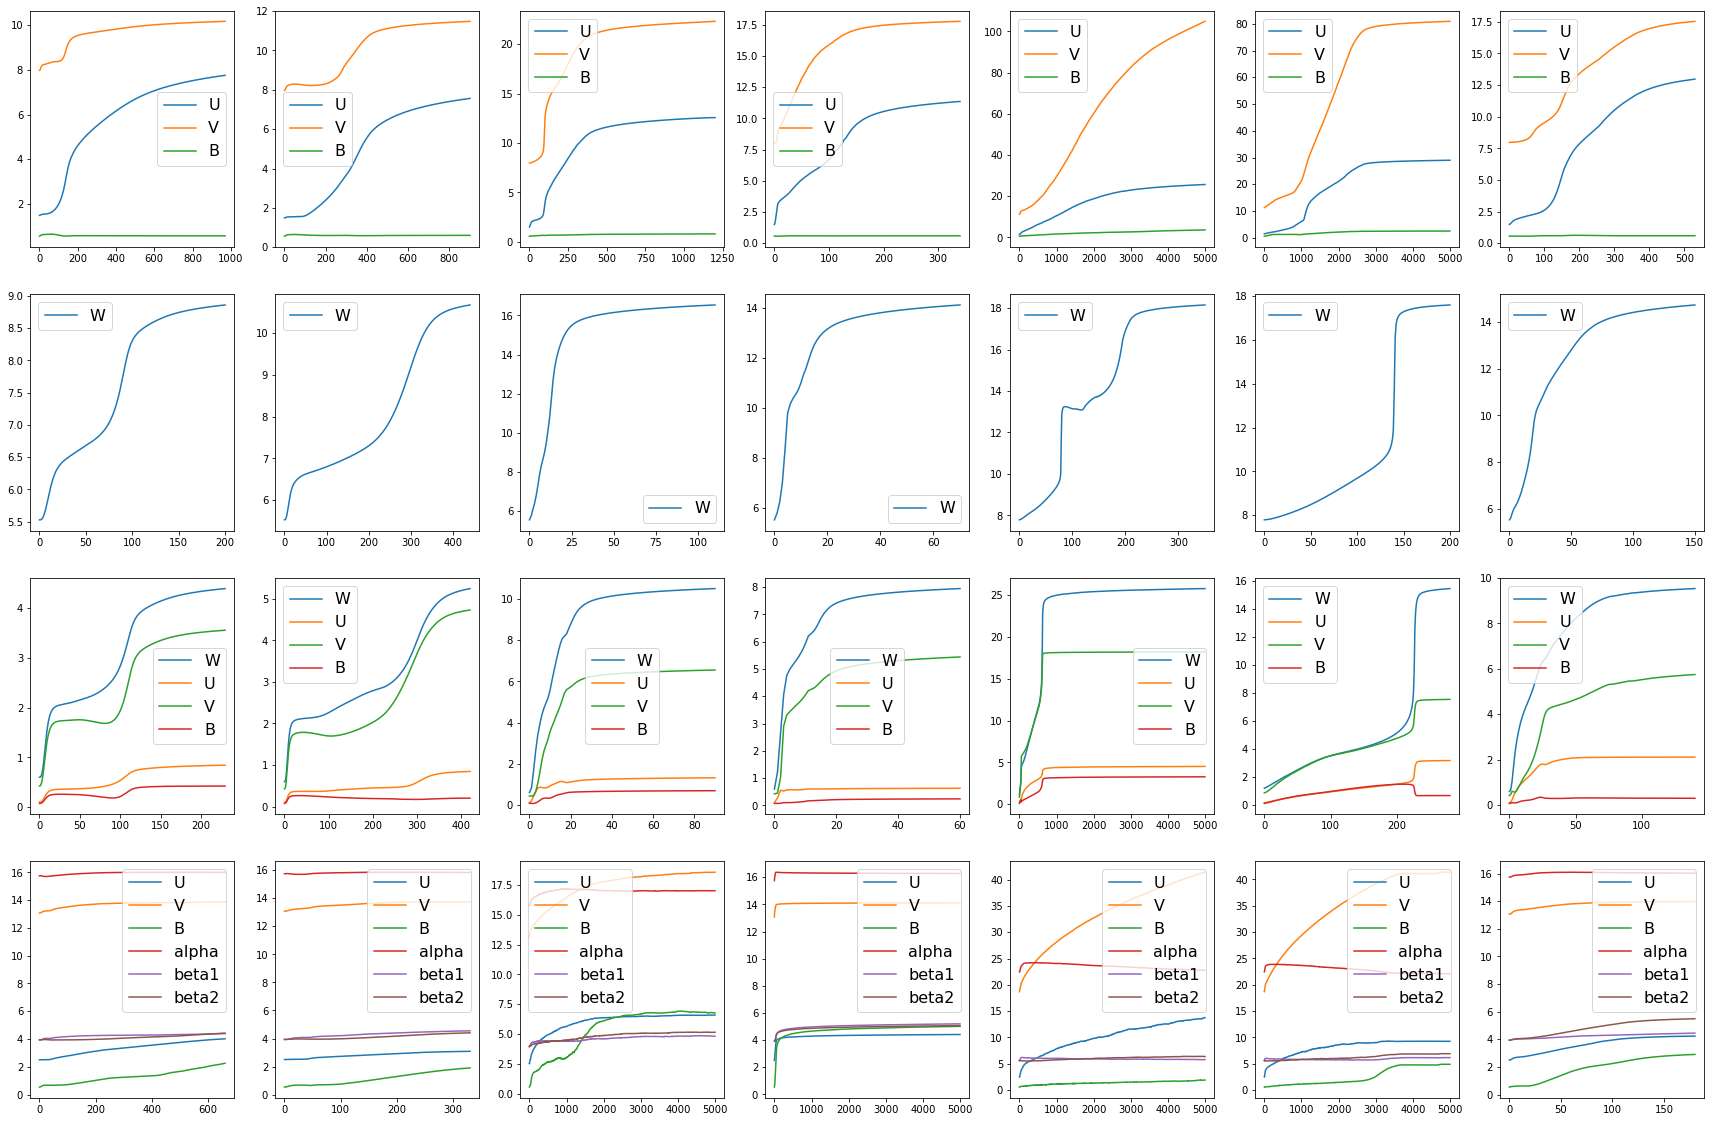

In [79]:
seed = 1

fig, ax = plt.subplots(nrows=len(rnn_names), ncols=num_grammars, figsize=(30, 20))
#fig.suptitle('The L2-norm of updated weights during training', fontsize=20)
for row, m in zip(ax, rnn_names):
    for col, g in zip(row, range(1,num_grammars+1)):
        params_log_filename = './params/tomita/g' + str(g) + '_' + m + '_h' \
                                  + str(rnn_config_lib[m]['nhid'][g-1]) \
                                  + '_seed' + str(seed) + '_params_log.npz'
        
        params_log_file = np.load(params_log_filename)
        params_log = params_log_file['log']
        assert params_log.shape[1] == len(rnn_config_lib[m]['weights'])
        #fig = plt.figure(figsize=(6, 4))
        for j in range(len(rnn_config_lib[m]['weights'])):
            col.plot(params_log[:,j], label=rnn_config_lib[m]['weights'][j])
            
        #plt.title(rnn_config_lib[m]['name'] + " Grammar " + str(g), fontsize=16)
        #plt.ylabel('L2-norm of weights', fontsize=16)
        #plt.xlabel('epoch', fontsize=16)
        col.legend(loc='best', fontsize=16)
        #plt.show()
        
        
plt.show()



In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)